
# Project:  The Movie Database (TMDb) Analysis - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
 This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
 
 I aim to explore and visualize the data, while mainly focusing on the revenue_adj and the genre.
 N.B. I used the adjusted revenue in order to avoid any possible confounding due to different timelines.
  
 The dataset includes the following columns: 
<ul>
    <li>id</li>
    <li>imdb_id</li>
    <li>popularity</li>
    <li>budget</li>
    <li>revenue</li>
    <li>original_title</li>
    <li>cast: contain multiple values separated by pipe (|) characters.</li>
    <li>homepage</li>
    <li>director</li>
    <li>tagline</li>
    <li>keywords: contain multiple values separated by pipe (|) characters.</li>
    <li>overview</li>
    <li>runtime</li>
    <li>genre: contain multiple values separated by pipe (|) characters.</li>
    <li>production: contain multiple values separated by pipe (|) characters.</li>
    <li>release_date</li>
    <li>vote_count</li>
    <li>vote_average</li>
    <li>release_year</li>
    <li>budget_adj: show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.</li> 
    <li>revenue_adj: show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.</li>
</ul>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
<ul>
    <li>Duplicated rows were droped ~ 1 row</li>
    <li>Rows with missing genre were dropped as well ~ 23 rows</li> 
    <li>Values in genre column were splited into multiple columns</li>
    <li>Columns not needed for analysis were dropped</li>
</ul>

In [7]:
# Drop duplicated
df.drop_duplicates(inplace=True)

# Drop unnecessary columns
df.drop(['id', 'imdb_id', 'budget', 'revenue', 'homepage', 'keywords', 'overview', 'release_date'], axis=1,inplace=True)

# Move "original_title" to 1st colunm position
first_column = df.pop('original_title')
df.insert(0, 'original_title', first_column)

# Drop NAs in genres column
df.dropna(subset=(['genres']), inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        10842 non-null  object 
 1   popularity            10842 non-null  float64
 2   cast                  10767 non-null  object 
 3   director              10800 non-null  object 
 4   tagline               8036 non-null   object 
 5   runtime               10842 non-null  int64  
 6   genres                10842 non-null  object 
 7   production_companies  9826 non-null   object 
 8   vote_count            10842 non-null  int64  
 9   vote_average          10842 non-null  float64
 10  release_year          10842 non-null  int64  
 11  budget_adj            10842 non-null  float64
 12  revenue_adj           10842 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis



### Movies' Revenue - Explore!

Top 10 Movies with highest revenue in all times!

In [9]:
top_10 = df.sort_values('revenue_adj', ascending=False)
top_10.drop(['popularity', 'cast', 'production_companies', 'vote_count', 'budget_adj' ], axis=1,inplace=True)
top_10.head(10)

,original_title,director,tagline,runtime,genres,vote_average,release_year,revenue_adj
1386,Avatar,James Cameron,Enter the World of Pandora.,162,Action|Adventure|Fantasy|Science Fiction,7.1,2009,2.827124e+09
1329,Star Wars,George Lucas,"A long time ago in a galaxy far, far away...",121,Adventure|Action|Science Fiction,7.9,1977,2.789712e+09
5231,Titanic,James Cameron,Nothing on Earth could come between them.,194,Drama|Romance|Thriller,7.3,1997,2.506406e+09
10594,The Exorcist,William Friedkin,Something almost beyond comprehension is happe...,122,Drama|Horror|Thriller,7.2,1973,2.167325e+09
9806,Jaws,Steven Spielberg,Don't go in the water.,124,Horror|Thriller|Adventure,7.3,1975,1.907006e+09
3,Star Wars: The Force Awakens,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.902723e+09
8889,E.T. the Extra-Terrestrial,Steven Spielberg,He is afraid. He is alone. He is three million...,115,Science Fiction|Adventure|Family|Fantasy,7.2,1982,1.791694e+09
8094,The Net,Irwin Winkler,Her driver's license. Her credit cards. Her ba...,114,Crime|Drama|Mystery|Thriller|Action,5.6,1995,1.583050e+09
10110,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,79,Adventure|Animation|Comedy|Family,6.6,1961,1.574815e+09
4361,The Avengers,Joss Whedon,Some assembly required.,143,Science Fiction|Action|Adventure,7.3,2012,1.443191e+09


Average revenue per decade

In [46]:
# Group years into decades, and add to a new column.... this will facilitate investigating different years
df.loc[df['release_year'] < 1970, 'release_decade'] = '1960s' 
df.loc[(df['release_year'] > 1970) & (df['release_year'] < 1980), 'release_decade'] = '1970s' 
df.loc[(df['release_year'] > 1980) & (df['release_year'] < 1990), 'release_decade'] = '1980s' 
df.loc[(df['release_year'] > 1990) & (df['release_year'] < 2000), 'release_decade'] = '1990s' 
df.loc[(df['release_year'] > 2000) & (df['release_year'] < 2010), 'release_decade'] = '2000s' 
df.loc[df['release_year'] >= 2010, 'release_decade'] = '2010s' 

print(df.groupby('release_decade').mean().revenue_adj)

def get_avg(avg):
        return 'The Average Revenue:' + str(avg)
        
get_avg(df['revenue_adj'].mean())

release_decade
1960s    5.660367e+07
1970s    8.326104e+07
1980s    5.571427e+07
1990s    6.414107e+07
2000s    5.113626e+07
2010s    3.855114e+07
Name: revenue_adj, dtype: float64


'The Average Revenue:51477974.92250734'

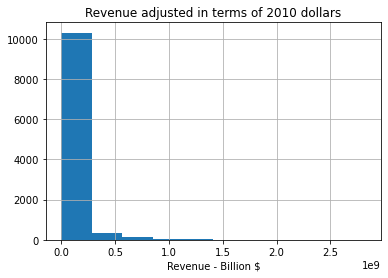

In [21]:
df.revenue_adj.hist( );
plt.title('Revenue adjusted in terms of 2010 dollars')
plt.xlabel('Revenue - Billion $');

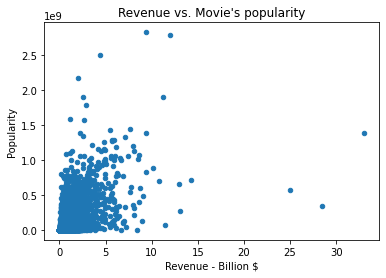

In [19]:
df.plot(x="popularity", y="revenue_adj", kind="scatter" );
plt.title('Revenue vs. Movie\'s popularity');
plt.xlabel('Revenue - Billion $');
plt.ylabel('Popularity');

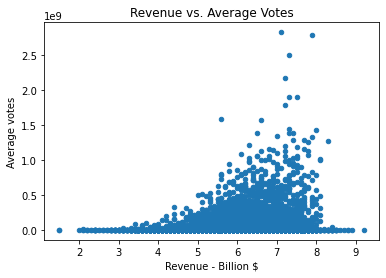

In [20]:
df.plot(x="vote_average", y="revenue_adj", kind="scatter" );
plt.title('Revenue vs. Average Votes');
plt.xlabel('Revenue - Billion $');
plt.ylabel('Average votes');

Comparing revenue against the movies' budget per year

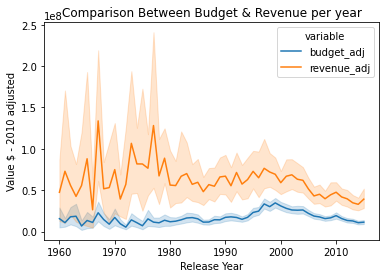

In [22]:
# Data was melted (reshaped) to easily plot both columns into one lineplot
df_melted = pd.melt(df, id_vars=['original_title'], value_vars=['budget_adj', 'revenue_adj'])
df_melted = pd.merge(df_melted,df[['original_title','release_year']],on='original_title', how='left')
#df_melted.head()
ax = sns.lineplot(data=df_melted, x="release_year", y="value", hue="variable")
ax.set(title='Comparison Between Budget & Revenue per year');
ax.set(xlabel='Release Year', ylabel='Value $ - 2010 adjusted')
plt.show()

## Disscusion 01:

The highest revenue movie was Avatar with an average vote of 7.1. The movie was released in 2009.

Average movie revenue was 5.1 Billion $.

Comparing the revenues with either average votes or movie's popularity didn't show strong correlation in any direction.

A peak in the movie's budget can be noticed between mid-90s and early 2000s.

The highest and lowest revenues can be seen in the 1960s.

The second highest reveunue was in the late 1970s, afterwards no significant increase or decrease was noted.

### Genres - Explore!

Split genres column to contain one value only.

In [24]:
df[['genres_01','genres_02', 'genres_03', 'genres_04','genres_05']] = df['genres'].str.split('|',expand=True)
df.head()

,original_title,popularity,cast,director,tagline,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_decade,genres_01,genres_02,genres_03,genres_04,genres_05
0,Jurassic World,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,2010s,Action,Adventure,Science Fiction,Thriller,None
1,Mad Max: Fury Road,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,2010s,Action,Adventure,Science Fiction,Thriller,None
2,Insurgent,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,2010s,Adventure,Science Fiction,Thriller,None,None
3,Star Wars: The Force Awakens,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,2010s,Action,Adventure,Science Fiction,Fantasy,None
4,Furious 7,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,2010s,Action,Crime,Thriller,None,None


The following are the top 10 most common genres:

In [25]:
genre_10 = df['genres'].value_counts().iloc[0:10]
genre_10

Comedy                  712
Drama                   712
Documentary             312
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          268
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Name: genres, dtype: int64

Average Votes for the most common genres

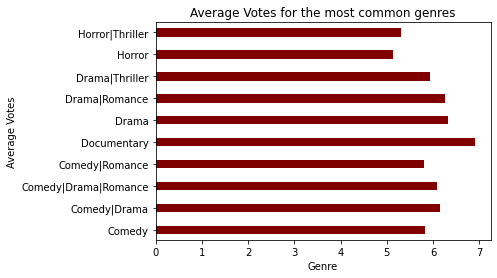

In [26]:
top = ['Comedy', 'Drama', 'Documentary', 'Drama|Romance', 'Comedy|Drama', 'Comedy|Romance', 'Horror|Thriller',
      'Horror', 'Comedy|Drama|Romance', 'Drama|Thriller']
genre_mean = df.loc[df['genres'].isin(top)]
x = genre_mean.groupby('genres').mean().vote_average
x.plot(kind='barh', color ='maroon', width = 0.4);
plt.title('Average Votes for the most common genres')
plt.xlabel('Genre')
plt.ylabel('Average Votes');

Average popularity among the top 10 genres

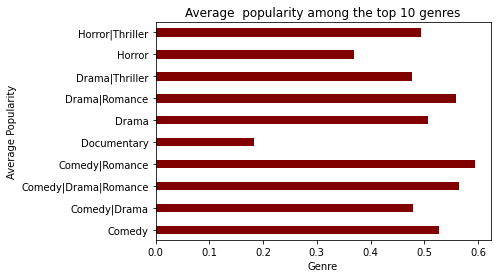

In [27]:
top = ['Comedy', 'Drama', 'Documentary', 'Drama|Romance', 'Comedy|Drama', 'Comedy|Romance', 'Horror|Thriller',
      'Horror', 'Comedy|Drama|Romance', 'Drama|Thriller']
genre_mean = df.loc[df['genres'].isin(top)]
x = genre_mean.groupby('genres').mean().popularity
x.plot(kind='barh', color ='maroon', width = 0.4); 
plt.title('Average  popularity among the top 10 genres')
plt.xlabel('Genre')
plt.ylabel('Average Popularity');

Least common genres:

In [28]:
genre_10 = df['genres'].value_counts().sort_values()
genre_10.head(10)

Drama|Adventure|Thriller                           1
Drama|Music|Romance|War                            1
History|Comedy|Drama                               1
Comedy|Family|Fantasy|Thriller|TV Movie            1
Action|Crime|Foreign|Thriller                      1
Drama|Family|Comedy|TV Movie                       1
Horror|Family|Foreign                              1
Family|Animation|Music|Drama                       1
Science Fiction|Adventure|Family|Fantasy           1
Science Fiction|Action|Adventure|Drama|Thriller    1
Name: genres, dtype: int64

Count of unique genres per decade

In [29]:
df.groupby('release_decade').nunique().genres

release_decade
1960s    198
1970s    243
1980s    434
1990s    602
2000s    955
2010s    905
Name: genres, dtype: int64

Common genres per decade

In [30]:
df.groupby(['release_decade'])['genres'].agg(pd.Series.mode)

release_decade
1960s     Drama
1970s     Drama
1980s    Comedy
1990s    Comedy
2000s    Comedy
2010s     Drama
Name: genres, dtype: object

Top 10 voted genres

In [31]:
vote = df.sort_values('vote_average', ascending=False)
vote_10 = vote.iloc[0:10,[0,6,9, 1]]
vote_10

,original_title,genres,vote_average,popularity
3894,The Story of Film: An Odyssey,Documentary,9.2,0.006925
538,The Mask You Live In,Documentary,8.9,0.114264
2269,Life Cycles,Documentary,8.8,0.222293
1200,Black Mirror: White Christmas,Drama|Horror|Mystery|Science Fiction|Thriller,8.8,0.129531
6911,Pink Floyd: Pulse,Music,8.7,0.212010
2401,Opeth: In Live Concert At The Royal Albert Hall,Music,8.6,0.067753
8221,A Personal Journey with Martin Scorsese Throug...,Documentary,8.5,0.194889
8839,Dave Chappelle: Killin' Them Softly,Comedy,8.5,0.157001
3690,The Art of Flight,Adventure|Documentary,8.5,0.321341
8411,Queen - Rock Montreal,Music,8.5,0.302908


Top 10 popular movies' genres

In [32]:
pop = df.sort_values('popularity', ascending=False)
pop_10 = pop.iloc[0:10,[0,6,1,9]]
pop_10

,original_title,genres,popularity,vote_average
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,32.985763,6.5
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,28.419936,7.1
629,Interstellar,Adventure|Drama|Science Fiction,24.949134,8.0
630,Guardians of the Galaxy,Action|Science Fiction|Adventure,14.311205,7.9
2,Insurgent,Adventure|Science Fiction|Thriller,13.112507,6.3
631,Captain America: The Winter Soldier,Action|Adventure|Science Fiction,12.971027,7.6
1329,Star Wars,Adventure|Action|Science Fiction,12.037933,7.9
632,John Wick,Action|Thriller,11.422751,7.0
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,11.173104,7.5
633,The Hunger Games: Mockingjay - Part 1,Science Fiction|Adventure|Thriller,10.739009,6.6


The top main genre (1st mentioned)

In [33]:
main_10 = df['genres_01'].value_counts()
main_10.head(10)

Drama          2453
Comedy         2319
Action         1590
Horror          915
Adventure       586
Thriller        491
Documentary     432
Animation       403
Crime           380
Fantasy         272
Name: genres_01, dtype: int64

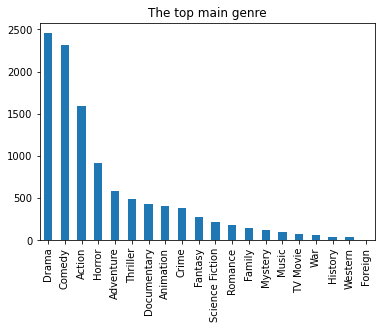

In [35]:
main_10.plot(kind='bar', title = "The top main genre");

## Discussion 02:

Through genre exploration, it seemed that Drama & Comedy are among the top common genres, with a count of 2453 & 2319, respectively.

However, the highest voted movie "The Story of Film: An Odyssey" was documentry, while the most popular movie "Jurassic World" was an action|adventure|science fiction.

Action, Adventure, Science Fiction, Thriller were among the highly popular movies.

Documentry, Music were among the top voted movies. 

The least common genres included (but not limited to):'Horror|Family|Foreign', 'Family|Animation|Music|Drama', 'Science Fiction|Adventure|Family|Fantasy'.

<a id='conclusions'></a>
## Conclusions

The movie with the highest revenue was "Avatar" released in 2009 and directed by James Cameron. The movie's revenue at release was 2.78 B (eq. to 2.87 B as per the year 2010).

On a general note, the difference between a movie's budget and its revenue seems to decrease as the years increase.

Further investigations between revenue and popularity/ voting average would be helpful.

Drama & Comedy seemed to be most common genres along the years. However, documentry genre was at top of the popular's movies.

The highest variety of genres were introduced in the 2000s.

### Limitations

The budget & revenue might need to be investigated closely, as the data is very skewed.

The genres would've been more insightful if they were categorized into much fewer number of groups.

There should be more explaination about the popularity column, i.e., how it was calculated, what does it represent precisely. 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])